In [1]:
import math
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy.stats import norm
from scipy import stats

In [2]:
df=pd.read_csv("braemar.csv")
df

,yyyy,mm,tmin
0,1959,1,-5.7
1,1959,2,-3.2
2,1959,3,0.8
3,1959,4,0.0
4,1959,5,4.6
...,...,...,...
734,2020,3,0.0
735,2020,4,-0.4
736,2020,5,3.7
737,2020,6,7.9


In [3]:
value=df['tmin']
value

0     -5.7
1     -3.2
2      0.8
3      0.0
4      4.6
      ... 
734    0.0
735   -0.4
736    3.7
737    7.9
738    7.6
Name: tmin, Length: 739, dtype: float64

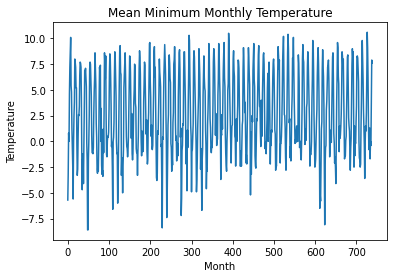

In [4]:
plt.plot(value)
plt.title("Mean Minimum Monthly Temperature")
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.show()

In [5]:
type(value)

pandas.core.series.Series

In [6]:
# https://pythontic.com/pandas/series-computations/skewness
series = value;
skewness = series.skew();
print("Skewness:");
print(round(skewness,2));

Skewness:
-0.05


In [7]:
value=np.array(value)

(array([  7.,  14.,  24., 100., 150., 106.,  79.,  94., 115.,  50.]),
 array([-8.6 , -6.68, -4.76, -2.84, -0.92,  1.  ,  2.92,  4.84,  6.76,
         8.68, 10.6 ]),
 <a list of 10 Patch objects>)

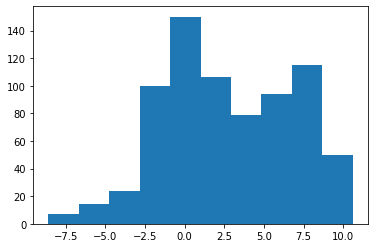

In [8]:
plt.hist(value)

In [9]:
np.mean(value)

2.7231393775372124

In [10]:
np.median(value)

2.2

In [11]:
scipy.stats.mode(value)

ModeResult(mode=array([0.]), count=array([18]))

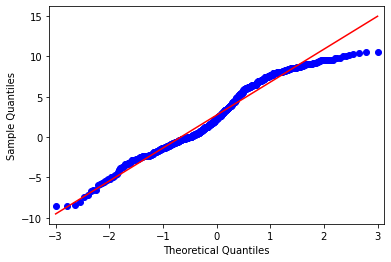

In [12]:
# QQ Plot - https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# q-q plot
qqplot(value, line='s')
pyplot.show()

## Monte Carlo Simulation

In [13]:
mu=np.mean(value)
sigma=np.std(value)

In [14]:
mu

2.7231393775372124

In [15]:
sigma

4.082818933287181

In [16]:
np.min(df)

yyyy    1959.0
mm         1.0
tmin      -8.6
dtype: float64

In [17]:
np.max(df)

yyyy    2020.0
mm        12.0
tmin      10.6
dtype: float64

In [18]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewnorm.html
from scipy.stats import skewnorm
a=-0.05
data= skewnorm.rvs(a, size=1000)

In [19]:
data

array([ 1.10993586e-01,  1.92293755e+00, -1.29797928e+00, -1.36817895e+00,
       -4.08836917e-01, -2.20566871e-01, -1.80936352e+00,  2.64214569e-01,
        6.96474795e-01,  1.12808864e+00,  5.51906452e-01,  1.03356553e+00,
        4.16952802e-01,  1.63151303e-01,  3.63998252e-03, -4.93656225e-01,
        2.30322650e+00, -4.07348158e-01, -4.34647526e-01,  1.77525665e+00,
        6.89177175e-01, -1.17984811e+00, -2.57539519e+00,  7.15376265e-01,
       -3.68541458e-01, -3.08439384e-01, -2.02019481e-01, -2.77114998e-01,
       -4.82364033e-01, -1.77194476e-01,  1.77647249e+00,  1.55420671e-01,
       -2.29335973e+00,  1.92952261e-02,  2.50834256e-01,  4.06370325e-01,
        1.47840963e-01, -2.34869224e-01, -3.00919057e-01,  8.59860879e-01,
        9.12609419e-01,  1.24951822e-01,  4.61033512e-01, -3.04144818e-01,
       -1.24879290e+00,  5.50691224e-01, -9.84821756e-01, -4.77630509e-01,
       -8.38724566e-01, -1.44675253e-01,  4.13363752e-01,  3.52407744e-01,
        6.28252871e-01,  

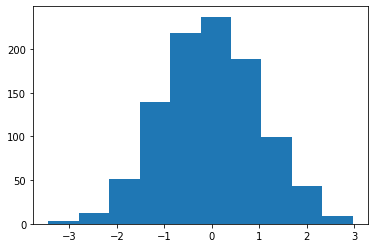

In [20]:
plt.hist(data)
plt.show()

In [21]:
y = (mu + sigma) * data
num_bins = 50

In [22]:
y

array([ 7.55417717e-01,  1.30874328e+01, -8.83399285e+00, -9.31176887e+00,
       -2.78252701e+00, -1.50116893e+00, -1.23144527e+01,  1.79823334e+00,
        4.74017842e+00,  7.67772427e+00,  3.75625230e+00,  7.03440390e+00,
        2.83776339e+00,  1.11040097e+00,  2.47735693e-02, -3.35980369e+00,
        1.56756636e+01, -2.77239458e+00, -2.95819294e+00,  1.20823228e+01,
        4.69051112e+00, -8.02999706e+00, -1.75280323e+01,  4.86882104e+00,
       -2.50827780e+00, -2.09922559e+00, -1.37493617e+00, -1.88603312e+00,
       -3.28294950e+00, -1.20597821e+00,  1.20905977e+01,  1.05778661e+00,
       -1.56085107e+01,  1.31322504e-01,  1.70716749e+00,  2.76573949e+00,
        1.00619943e+00, -1.59851015e+00, -2.04804256e+00,  5.85217729e+00,
        6.21118166e+00,  8.50416893e-01,  3.13777486e+00, -2.06999695e+00,
       -8.49923242e+00,  3.74798151e+00, -6.70265581e+00, -3.25073333e+00,
       -5.70832443e+00, -9.84653742e-01,  2.81333647e+00,  2.39847242e+00,
        4.27586285e+00,  

Text(0.5, 1.0, 'Histogram of Temperature Simulations')

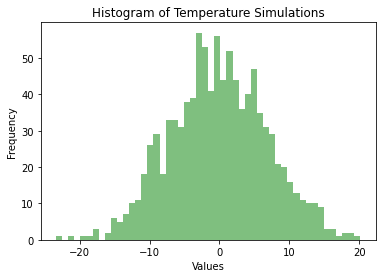

In [23]:
# Histogram
plt.hist(y, num_bins, facecolor='green', alpha=0.5)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title(r'Histogram of Temperature Simulations')

In [24]:
np.min(y)

-23.41116309280792

In [25]:
np.max(y)

20.189223948075153